## Retail store sales analysis project 

In [2]:
#Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#Load dataset
data = pd.read_excel(r"C:\Users\jays4\Downloads\Retail Store Dataset.xlsx")

In [4]:
#Display first few rows 
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
#Check for missing values 
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
#Summary statistics
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9983.000000,9983,9983,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000
mean,4993.886207,2017-04-30 02:56:24.714013952,2017-05-04 01:56:41.662826752,55245.233297,229.216818,3.788741,0.156375,28.463592
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2497.500000,2016-05-22 00:00:00,2016-05-26 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.727100
50%,4993.000000,2017-06-26 00:00:00,2017-06-29 00:00:00,57103.000000,54.384000,3.000000,0.200000,8.643600
75%,7489.500000,2018-05-14 00:00:00,2018-05-18 00:00:00,90008.000000,209.905000,5.000000,0.200000,29.315200
max,9994.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2883.738990,NaN,NaN,32038.715955,621.909610,2.223566,0.206501,234.122107


In [122]:
#Total sales per product 
sales_per_product = data.groupby("Product Name")["Sales"].sum().sort_values(ascending=False)

In [138]:
sales_per_product

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
                                                                                 ...    
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                                 7.700
Grip Seal Envelopes                                                                7.072
Xerox 20                                                                           6.480
Avery 5                                                                            5.760
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac                   1.624
Name: Sa

## Total sales by top 10 product

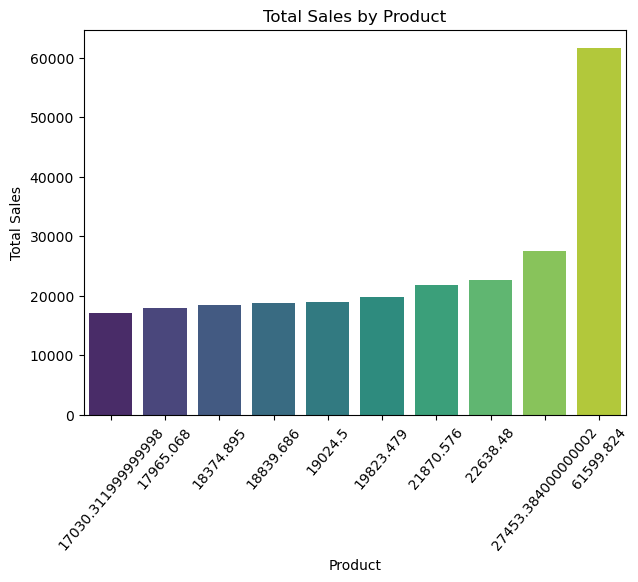

In [83]:
plt.figure(figsize=(7,5))
sns.barplot(x=sales_per_product[:10], y=sales_per_product[:10], palette="viridis")
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=50)
plt.show()

import warnings
warnings.filterwarnings("ignore")

# Insight
The bar graph compares the sales performance of the top 10 selling product and the top 10 lowest selling product. This visualization underscores the importance of focusing on high performing product while identifying
potential strategies to improve underperforming ones.

In [ ]:
#Sales Trends
sales_trand = data.groupby("Order Date")["Sales"].sum()

In [146]:
sales_trand

Order Date
2015-01-03      16.4480
2015-01-04     288.0600
2015-01-05      19.5360
2015-01-06    4407.1000
2015-01-07      87.1580
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: Sales, Length: 1235, dtype: float64

## Sales trand by top timing

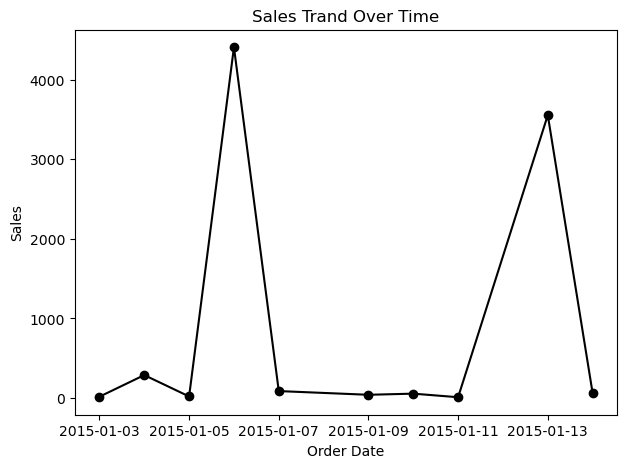

In [153]:
plt.figure(figsize=(7,5))
plt.plot(sales_trand[:10],marker="o",linestyle="-",color="k")
plt.title("Sales Trand Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show()

# Insight
The line graph giving us top most timing of sales while the selling of product over time.

In [16]:
#Sales by Region
sales_by_region =data.groupby("Region")["Sales"].sum()

In [17]:
sales_by_region

Region
Central    501239.8908
East       669851.8700
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

## Sales by Region

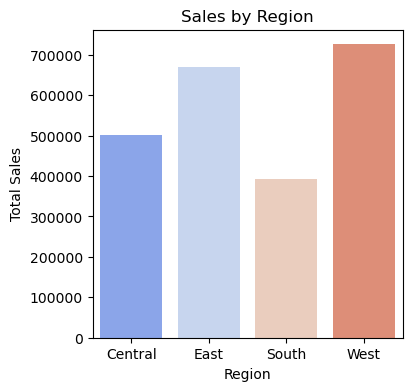

In [198]:
plt.figure(figsize=(4,4))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="coolwarm")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

import warnings
warnings.filterwarnings("ignore")

# Insight
The bar plot illustrates the distribution of sales across different regions.The highest sales are observed in [West],
which significantly outperforms other regions, indicating strong market presence or demand.Regions like[East] and [Central] 
show moderate sales,while [South] has the lowest sales,suggesting potential challenges or untapped opportunities.Overall,the plot highlights
regional disparities in sales performance,emphasizing the need for targeted strategies to boost underperforming areas and sustain growth in 
high-performing regions.

## Top Selling Products

In [204]:
top_product = data.groupby("Product Name")["Sales"].sum().reset_index().sort_values(by="Sales",ascending=False)
top_product.head(5)

,Product Name,Sales
403,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
443,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
